In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras import layers, models

from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


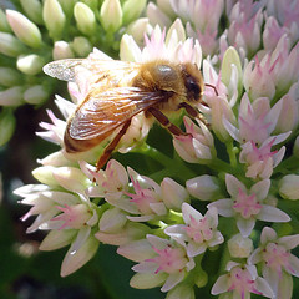

In [2]:
img = load_img('data/train/bee/20997149292_3b5fd09795_m.jpg', target_size=(299, 299))
img

In [3]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 4s 0us/step


In [4]:
x = np.array(img)
X = preprocess_input(np.array([x]))
pred = model.predict(X)
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n02206856', 'bee', 0.9817153),
  ('n02190166', 'fly', 0.006093478),
  ('n07730033', 'cardoon', 0.002007336),
  ('n11879895', 'rapeseed', 0.00046831573),
  ('n02727426', 'apiary', 0.00039634685)]]

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that. 

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

sgd_optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.8)
model.compile(optimizer=sgd_optimizer, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [6]:
train_gen = ImageDataGenerator(rescale=1./255)
train_ds = train_gen.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

val_gen = ImageDataGenerator(rescale=1./255)
val_ds = val_gen.flow_from_directory(
    'data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

train_ds.class_indices

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


{'bee': 0, 'wasp': 1}

In [7]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
184/184 [==============================] - 20s 96ms/step - loss: 0.6571 - accuracy: 0.6010 - val_loss: 0.5974 - val_accuracy: 0.6569
Epoch 2/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5787 - accuracy: 0.6962 - val_loss: 0.5835 - val_accuracy: 0.7015
Epoch 3/10
184/184 [==============================] - 9s 49ms/step - loss: 0.5446 - accuracy: 0.7245 - val_loss: 0.5767 - val_accuracy: 0.7168
Epoch 4/10
184/184 [==============================] - 9s 46ms/step - loss: 0.5164 - accuracy: 0.7533 - val_loss: 0.5908 - val_accuracy: 0.6536
Epoch 5/10
184/184 [==============================] - 9s 48ms/step - loss: 0.4326 - accuracy: 0.8118 - val_loss: 0.5346 - val_accuracy: 0.7505
Epoch 6/10
184/184 [==============================] - 8s 46ms/step - loss: 0.3306 - accuracy: 0.8722 - val_loss: 0.5798 - val_accuracy: 0.7549
Epoch 7/10
184/184 [==============================] - 9s 47ms/step - loss: 0.2052 - accuracy: 0.9290 - val_loss: 0.8047 - val_accuracy: 0.722

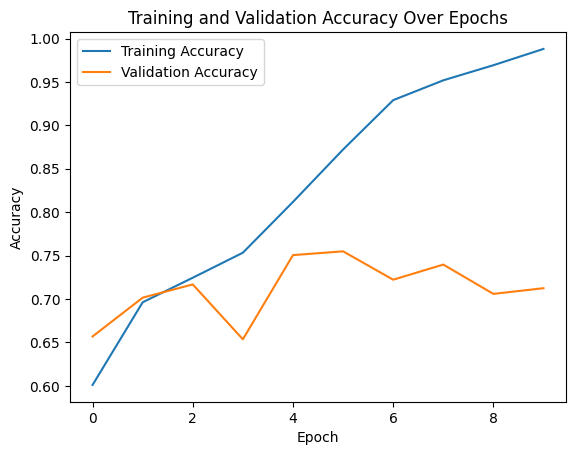

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Question 3

What is the median of training accuracy for all the epochs for this model?

In [9]:
acc = np.array(history.history['accuracy'])
np.median(acc)

0.8419907689094543

### Question 4

What is the standard deviation of training loss for all the epochs for this model?


In [10]:
np.std(acc)

0.12588299529105912

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [11]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.


### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

In [12]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
184/184 [==============================] - 25s 138ms/step - loss: 0.5634 - accuracy: 0.7479 - val_loss: 0.5144 - val_accuracy: 0.7778
Epoch 2/10
184/184 [==============================] - 28s 153ms/step - loss: 0.4987 - accuracy: 0.7664 - val_loss: 0.5990 - val_accuracy: 0.7309
Epoch 3/10
184/184 [==============================] - 28s 151ms/step - loss: 0.4990 - accuracy: 0.7737 - val_loss: 0.4755 - val_accuracy: 0.7854
Epoch 4/10
184/184 [==============================] - 28s 154ms/step - loss: 0.4863 - accuracy: 0.7764 - val_loss: 0.4722 - val_accuracy: 0.7865
Epoch 5/10
184/184 [==============================] - 27s 147ms/step - loss: 0.4739 - accuracy: 0.7909 - val_loss: 0.4668 - val_accuracy: 0.7898
Epoch 6/10
184/184 [==============================] - 25s 137ms/step - loss: 0.4761 - accuracy: 0.7849 - val_loss: 0.4720 - val_accuracy: 0.7952
Epoch 7/10
184/184 [==============================] - 28s 150ms/step - loss: 0.4788 - accuracy: 0.7830 - val_loss: 0.4724 - val_ac

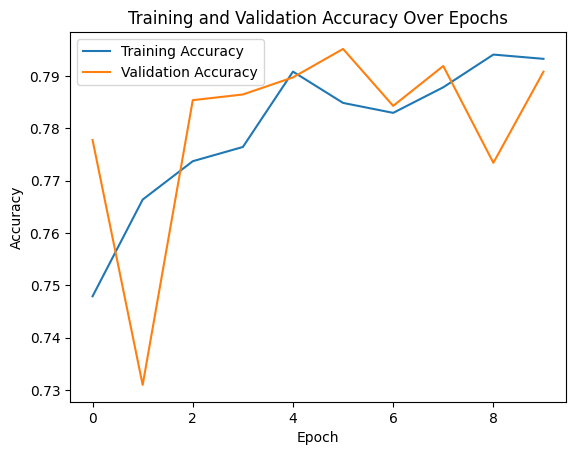

In [13]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
acc_val = np.array(history.history['val_loss'])
np.mean(acc_val)

0.4887285202741623

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?


In [15]:
acc_val = np.array(history.history['val_accuracy'])[5:]
np.mean(acc_val)

0.7871459722518921